# Import modules


In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
Planted trees in the metropole of grenoble.\
Source: [metropole grenoble](https://data.metropolegrenoble.fr/visualisation/information/?id=arbres-grenoble&disjunctive.sous_categorie_desc&disjunctive.espece&location=12,45.18821,5.74699)

In [132]:
df=pd.read_csv(
    'data/arbres_grenoble_epsg4326.csv',
    sep=',',
    index_col=0
)

In [133]:
df.head()

,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,code_parent_desc,...,diametrearbre,causeabattage,collectivite,stationmetro,hauteurarbre,portarbre,structure,forme,typenature,geo_point_2d
elem_point_id,,,,,,,,,,,,,,,,,,,,,
34835,ESP36318,AR36318,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167098421885385,5.740131798404362"
34836,ESP36319,AR36319,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.16710682038838,5.740199792549315"
34837,ESP36320,AR36320,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167115270975415,5.740265608803635"
34838,ESP36321,AR36321,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.16712715617142,5.740349032579623"
34839,ESP36322,AR36322,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167144245872265,5.740471081600832"


# Clean
## Full of na

In [134]:
#I drop columns that are full of na
df.dropna(axis=1,how='all',inplace=True)
#I drop lines that are full of na
df.dropna(axis=0,how='all',inplace=True)
df.columns.values

array(['code', 'nom', 'genre', 'genre_desc', 'categorie',
       'categorie_desc', 'sous_categorie', 'sous_categorie_desc',
       'code_parent', 'code_parent_desc', 'adr_secteur', 'bien_reference',
       'genre_bota', 'espece', 'variete', 'stadededeveloppement',
       'remarques', 'anneedeplantation', 'raisondeplantation',
       'traitementchenilles', 'identifiantplu', 'typeimplantationplu',
       'intituleprotectionplu', 'collectivite', 'stationmetro',
       'hauteurarbre', 'portarbre', 'structure', 'forme', 'typenature',
       'geo_point_2d'], dtype=object)

## Rename columns

In [135]:
#I rename columns to clearer names
dict_to_rename_columns=dict(
    stadededeveloppement='stade_de_developpement',
    anneedeplantation='annee_de_plantation',
    raisondeplantation='raison_de_plantation',
    traitementchenilles='traitement_chenilles',
    identifiantplu='identifiant_plu',
    typeimplantationplu='type_implantation_plu',
    intituleprotectionplu='intitule_protection_plu',
    stationmetro='station_metro',
    hauteurarbre='hauteur_arbre',
    portarbre='port_arbre',
    typenature='type_nature'
)
df.rename(columns=dict_to_rename_columns, inplace=True)

In [136]:
df.head()

,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,code_parent_desc,...,type_implantation_plu,intitule_protection_plu,collectivite,station_metro,hauteur_arbre,port_arbre,structure,forme,type_nature,geo_point_2d
elem_point_id,,,,,,,,,,,,,,,,,,,,,
34835,ESP36318,AR36318,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167098421885385,5.740131798404362"
34836,ESP36319,AR36319,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.16710682038838,5.740199792549315"
34837,ESP36320,AR36320,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167115270975415,5.740265608803635"
34838,ESP36321,AR36321,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.16712715617142,5.740349032579623"
34839,ESP36322,AR36322,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167144245872265,5.740471081600832"


## One unique value

In [137]:
#I drop and store in a dict columns that only have one value
dict_column_one_value=dict()
for col in df.columns:
    if df[col].unique().shape[0]<=1:
        dict_column_one_value[col]=df[col].unique()[0]
        df.drop(col, inplace=True, axis='columns')
dict_column_one_value

{'genre': 'VEG',
 'genre_desc': 'VEGETATION',
 'categorie': 'ESP01',
 'categorie_desc': 'Arbre'}

## Less 20% Na values

In [138]:
dict_column_too_many_na=dict()
threshold=df.shape[0]*0.2
for col in df.columns:
    if df[col].isna().value_counts().shape[0]==2:
        if df[col].isna().value_counts().loc[True]>=threshold:
            pct=df[col].isna().value_counts().loc[True]/df.shape[0]*100
            dict_column_too_many_na[col]=f"{round(pct,2)}%"
            df.drop(col, inplace=True, axis='columns')
dict_column_too_many_na

{'variete': '85.48%',
 'remarques': '83.23%',
 'raison_de_plantation': '89.62%',
 'traitement_chenilles': '93.48%',
 'identifiant_plu': '98.15%',
 'type_implantation_plu': '84.31%',
 'intitule_protection_plu': '98.15%',
 'station_metro': '94.06%',
 'hauteur_arbre': '22.79%',
 'port_arbre': '41.08%',
 'forme': '73.23%',
 'type_nature': '41.08%'}

## Only unique values

In [139]:
list_column_unique=list()
for col in df.columns:
    if df[col].unique().shape[0]==df.shape[0]:
        list_column_unique.append(col)
list_column_unique

['code', 'nom', 'bien_reference', 'geo_point_2d']

In [140]:
df[df['nom']!=df['bien_reference']]

,code,nom,sous_categorie,sous_categorie_desc,code_parent,code_parent_desc,adr_secteur,bien_reference,genre_bota,espece,stade_de_developpement,annee_de_plantation,collectivite,structure,geo_point_2d
elem_point_id,,,,,,,,,,,,,,,


Name and bien_referenbce are the same.\
I'll drop those two and code

In [141]:
list_column_unique.remove('geo_point_2d')
print(list_column_unique)
df.drop(columns=list_column_unique, inplace=True)

['code', 'nom', 'bien_reference']


## Description

In [142]:
print(all(df.groupby('code_parent')['code_parent_desc'].nunique()==1))
print(all(df.groupby('code_parent_desc')['code_parent'].nunique()==1))
print(all(df.groupby('sous_categorie')['sous_categorie_desc'].nunique()==1))
print(all(df.groupby('sous_categorie_desc')['sous_categorie'].nunique()==1))

True
True
True
True


Those columns exactly corresponds to each other so I delete te two "description one"

In [143]:
df.drop(columns=['sous_categorie_desc','code_parent_desc'], inplace=True)

# Split geo point to two columns

In [144]:
df[['longitude','latitude']]=df['geo_point_2d'].str.split(",",n=1,expand=True).replace('',np.nan).astype(float)

# Strucutre

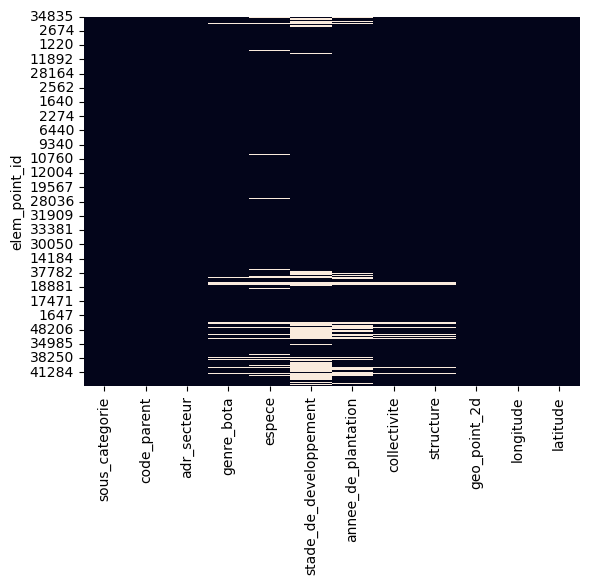

In [145]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [146]:
df.sample(5)

,sous_categorie,code_parent,adr_secteur,genre_bota,espece,stade_de_developpement,annee_de_plantation,collectivite,structure,geo_point_2d,longitude,latitude
elem_point_id,,,,,,,,,,,,
32250,ESP151,ESP196,2,Cornus,controversa,Arbre jeune,2014.0,Grenoble Alpes Métropole,Métropole de Grenoble,"45.18729108670941,5.718998356510626",45.187291,5.718998
9539,ESP151,ESP873,3,Liriodendron,tulipifera,Arbre jeune,2002.0,Grenoble Alpes Métropole,Métropole de Grenoble,"45.18006721129494,5.7085130657653576",45.180067,5.708513
9162,ESP174,ESP720,5,Platanus,acerifolia,Arbre adulte,1975.0,Ville de Grenoble,Ville de Grenoble,"45.187472505110605,5.742283548034502",45.187473,5.742284
12316,ESP174,ESP234,2,Carpinus,betulus,Arbre adulte,1992.0,Ville de Grenoble,Ville de Grenoble,"45.20027968905314,5.735375233543913",45.200280,5.735375
7046,ESP151,ESP215,6,Pyrus,calleryana,Arbre adulte,2004.0,Grenoble Alpes Métropole,Métropole de Grenoble,"45.16652542956303,5.7258270448328075",45.166525,5.725827


# Pickle

In [147]:
df.to_pickle(
    'data/arbres_grenoble_clean.pkl'
)

In [148]:
df.shape

(31670, 12)